In [148]:
# from MIRNet.mirnet.inference import Inferer
# from MIRNet.mirnet.utils import download_dataset, plot_result

In [153]:
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from huggingface_hub import from_pretrained_keras
def read_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image.set_shape([None, None, 3])
    image = tf.cast(image, dtype=tf.float32) / 255.0
    return image

In [5]:
model = from_pretrained_keras(
    "keras-io/lowlight-enhance-mirnet", compile=False)


config.json not found in HuggingFace Hub


In [9]:
model.get_input_shape_at

<bound method Layer.get_input_shape_at of <keras.engine.functional.Functional object at 0x7f7aec5fee80>>

In [11]:
model.save("main_model")

2022-04-10 16:56:08.627416: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: main_model.tf/assets


In [1]:
from keras.models import load_model

In [2]:
model_1=load_model('main_model')

2022-04-11 19:52:33.273416: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model_1.compile()

In [4]:
import cv2

In [5]:
from PIL import Image
Image.Resampling


<enum 'Resampling'>

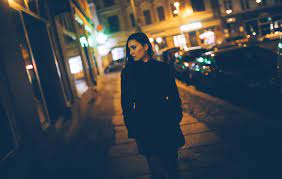

In [6]:
low_light_img = Image.open(
    'sample_test_cases/img1.jpg').convert('RGB')
low_light_img


In [188]:
import cv2

im = cv2.imread('sample_test_cases/img1.jpg', cv2.COLOR_BGR2RGB)#[:, :, ::-1]
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)


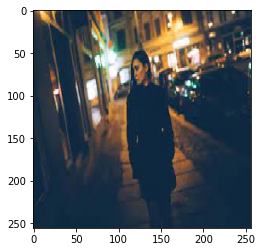

In [105]:
plt.imshow(cv2.resize(im, (256, 256),
           interpolation=cv2.INTER_NEAREST))


In [7]:
low_light_img = low_light_img.resize((256,256),Image.NEAREST)

/var/folders/kn/v4t8jjps02sd9mchfjfy9trm0000gn/T/ipykernel_8564/1861137023.py:1: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  low_light_img = low_light_img.resize((256,256),Image.NEAREST)


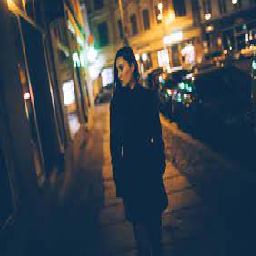

In [8]:
low_light_img


In [9]:
import keras
image = keras.preprocessing.image.img_to_array(low_light_img)

In [11]:
# image=Image.open(f).convert('RGB')
# image = image.resize((256,256),Image.NEAREST)
# image = keras.preprocessing.image.img_to_array(image)
# image = image.astype('float32') / 255.0
# img= cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

In [12]:
image = image.astype('float32') / 255.0


In [13]:
image.shape


(256, 256, 3)

In [14]:
import numpy as np
image = np.expand_dims(image, axis=0)


In [15]:
image.shape

(1, 256, 256, 3)

In [16]:
model.input_spec

NameError: name 'model' is not defined

In [17]:
image

array([[[[0.39607844, 0.2784314 , 0.28627452],
         [0.41960785, 0.29803923, 0.2784314 ],
         [0.48235294, 0.3372549 , 0.2627451 ],
         ...,
         [0.14117648, 0.21960784, 0.2627451 ],
         [0.07843138, 0.16470589, 0.21568628],
         [0.07843138, 0.16470589, 0.21568628]],

        [[0.36078432, 0.25882354, 0.25490198],
         [0.3882353 , 0.28235295, 0.25490198],
         [0.44313726, 0.3137255 , 0.23921569],
         ...,
         [0.15294118, 0.22352941, 0.2784314 ],
         [0.09019608, 0.16470589, 0.21960784],
         [0.09019608, 0.16470589, 0.21960784]],

        [[0.36078432, 0.25882354, 0.25490198],
         [0.3882353 , 0.28235295, 0.25490198],
         [0.44313726, 0.3137255 , 0.23921569],
         ...,
         [0.15294118, 0.22352941, 0.2784314 ],
         [0.09019608, 0.16470589, 0.21960784],
         [0.09019608, 0.16470589, 0.21960784]],

        ...,

        [[0.05882353, 0.16470589, 0.24705882],
         [0.05882353, 0.16470589, 0.24705882]

In [18]:
output = model_1.predict(image)

In [19]:
output_image = output[0] * 255.0
output_image = output_image.clip(0,255)
output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))

output_image = np.uint32(output_image)


In [20]:
k=Image.fromarray(output_image.astype('uint8'),'RGB')

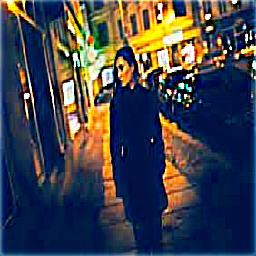

In [21]:
k